In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from bs4 import BeautifulSoup
import seaborn as sns
import re
import matplotlib.gridspec as gridspec

%matplotlib notebook

               Average Growth Rate        Country    Population
Country                                                        
bangladesh                  7.9445     bangladesh  1.626509e+08
brazil                      5.9280         brazil  2.117160e+08
china                      13.3445          china  1.394016e+09
india                       8.4020          india  1.326093e+09
indonesia                  10.0340      indonesia  2.670264e+08
mexico                      2.7830         mexico  1.286496e+08
nigeria                     8.7900        nigeria  2.140283e+08
pakistan                    5.6910       pakistan  2.335006e+08
russia                     13.4790         russia  1.417222e+08
united states               3.2545  united states  3.298775e+08


C:\Users\sunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
C:\Users\sunda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'Country' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


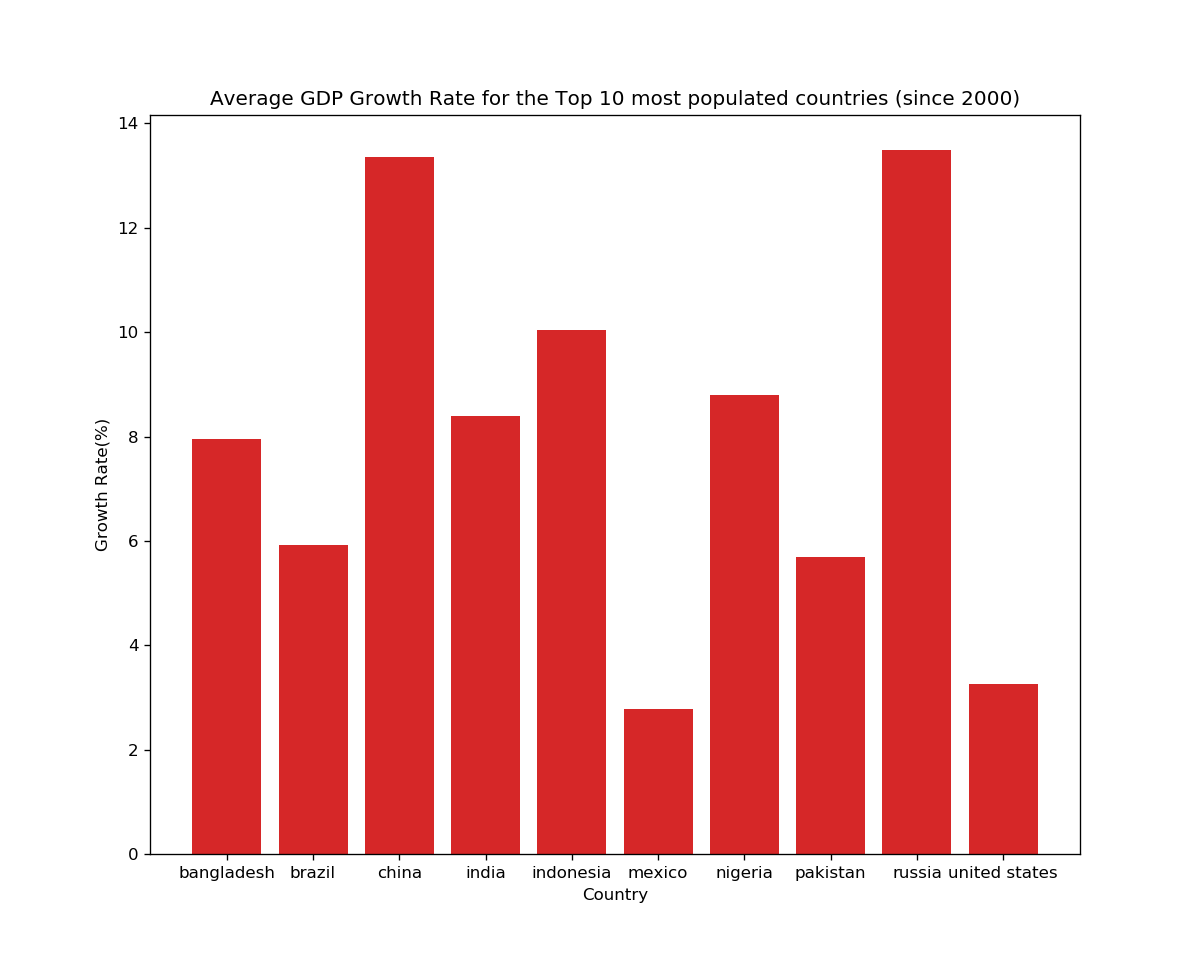

Text(0.5,0,'Country')

In [99]:
# read in data
data = pd.read_csv('gdp_data.csv')

# look at every year since 2000
since2k = data[data['Year'] >= 2000].sort_values(by='Year', ascending=True)

# Average the annual growth rates for the last 20 years for each country
out = since2k.groupby('Country')['Annual Growth Rate'].agg({'Average Growth Rate': np.average})
out['Country'] = out.index.tolist()
out = out.sort_values(by='Country', ascending=True)
out['Population'] = since2k[since2k['Year'] == 2019].sort_values(by='Country', ascending=True)['Population'].tolist()

print(out)

# Display Bar Chart
plt.figure(figsize=(10,8))
plt.bar(out['Country'].tolist(), out['Average Growth Rate'].tolist(), color='tab:red')
plt.gca().set_title('Average GDP Growth Rate for the Top 10 most populated countries (since 2000)')
plt.gca().set_ylabel('Growth Rate(%)')
plt.gca().set_xlabel('Country')

<IPython.core.display.Javascript object>


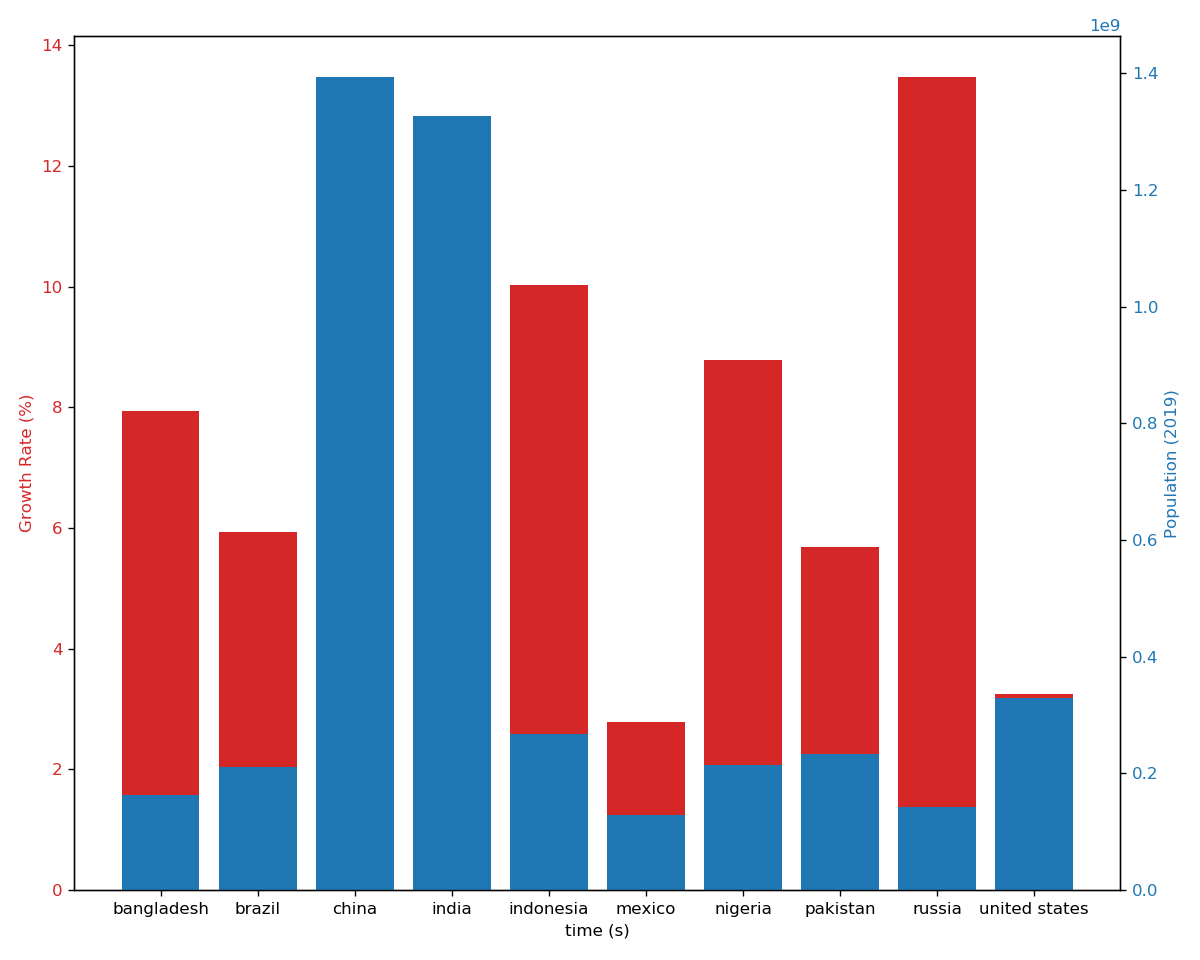

In [100]:
# Create some mock data

fig, ax1 = plt.subplots(figsize=(10,8))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Growth Rate (%)', color=color)
ax1.bar(out['Country'].tolist(), out['Average Growth Rate'].tolist(), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Population (2019)', color=color)  # we already handled the x-label with ax1
ax2.bar(out['Country'].tolist(), out['Population'].tolist(), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [94]:
# ax = fig.add_subplot(111) # Create matplotlib axes
# ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

# width = 0.4

# out['Average Growth Rate'].plot(kind='bar', secondary_y='Population', color='red', ax=ax, width=width, position=1)
# #out['Population'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

# ax.set_ylabel('Growth Rate (%)')
# ax2.set_ylabel('Population (2019)')

# plt.show()

C:\Users\sunda\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
